# Business Case: Aerofit - Descriptive Statistics & Probability

## About Aerofit
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


## Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1) Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

2) For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### Importing the essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Inspecting the dataset

In [2]:
! gdown 1WUQHm05aYJ215JFgm-549Ls2bZ45HzaC

Downloading...
From: https://drive.google.com/uc?id=1WUQHm05aYJ215JFgm-549Ls2bZ45HzaC
To: C:\Users\htc\original_aerofit_treadmill.csv

  0%|          | 0.00/7.28k [00:00<?, ?B/s]
100%|##########| 7.28k/7.28k [00:00<?, ?B/s]


In [3]:
df = pd.read_csv("C:/Users/htc/original_aerofit_treadmill.csv")

### This is how our data looks like

In [4]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.shape
print(f"Number of Datapoints : {df.shape[0]}\nNumber of Features : {df.shape[1]}")

Number of Datapoints : 180
Number of Features : 9


In [6]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


The column descriptions are as follows

Product : KP281, KP481, or KP781

Age: In years

Gender: Male/Female

Education: In years

MaritalStatus: Single or partnered

Usage: The average number of times the customer plans to use the treadmill each week.

Income: Annual income (in $)

Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles: The average number of miles the customer expects to walk/run each week

### All the features with their unique values

In [7]:
# Checking unique values in categorical columns

for i in df.select_dtypes(exclude=["number"]).columns:
    print(f'{i} : {df[i].unique()}')

Product : ['KP281' 'KP481' 'KP781']
Gender : ['Male' 'Female']
MaritalStatus : ['Single' 'Partnered']


### The types of Treadmills offered by Aerofit are:

KP281 : an entry-level treadmill that sells for $1,500

KP481 : for mid-level runners that sell for $1,750.

KP781 : a treadmill having advanced features that sell for $2,500.

In [8]:
for i in df.columns:
    print(i, ":", df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


### Descriptive Statistics of the dataset


In [9]:
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000



From the above tabular column, we can observe the following:

1. The average age of the customers is around 28 & the lowest age is 18 while the highest is 50.
2. The education years of a person ranges from 12 to 21 with 15.5 being the average.
3. Most people who buy treadmill deem themselves to be physically pretty fit with an average rating of 3.3/5 on the fitness scale.
4. The customers plan to use the tredmill for an average of 3.4 times a week and intend to run 103 miles/week on an average which is quite a stretch in my view.
5. Standard deviation for "Income" and "Miles" are very high. This variables might have outliers in it.

### Concise Summary

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


we have 6 numerical data types and 3 categorical data types.

### checking missing values & duplicated datapoints

In [11]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [12]:
df.duplicated().sum()

0

There are no missing values in our dataset which paves way to our analyis without any hiccups.


We do not have any duplicate values as well.

In [13]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [14]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [15]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

1. There are 3 unique products in the dataset.
2. KP281 is the most frequent product.
3. Out of 180 data points, 104 are Male and 76 are Female, and 107 are Partnered and 73 are single.

##  Exploratory Data Analysis

### Univariate Analysis

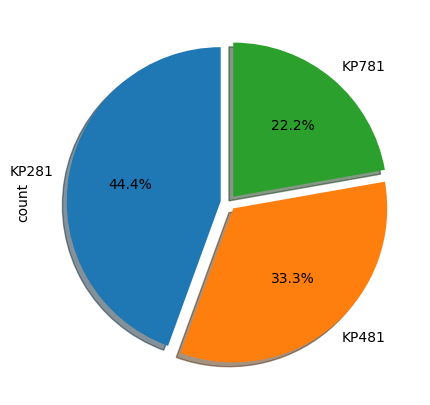

In [16]:
df['Product'].value_counts().plot(kind='pie',
                                  figsize = (5,5), 
                                  explode = [0.05,0.05,0.05],
                                  shadow = True,
                                  autopct = "%1.1f%%",
                                  startangle = 90)
plt.show()

Understanding the distribution of data for the quantitative attributes like "Age", "Education", "Usage", "Fitness", "Income" and "Miles".

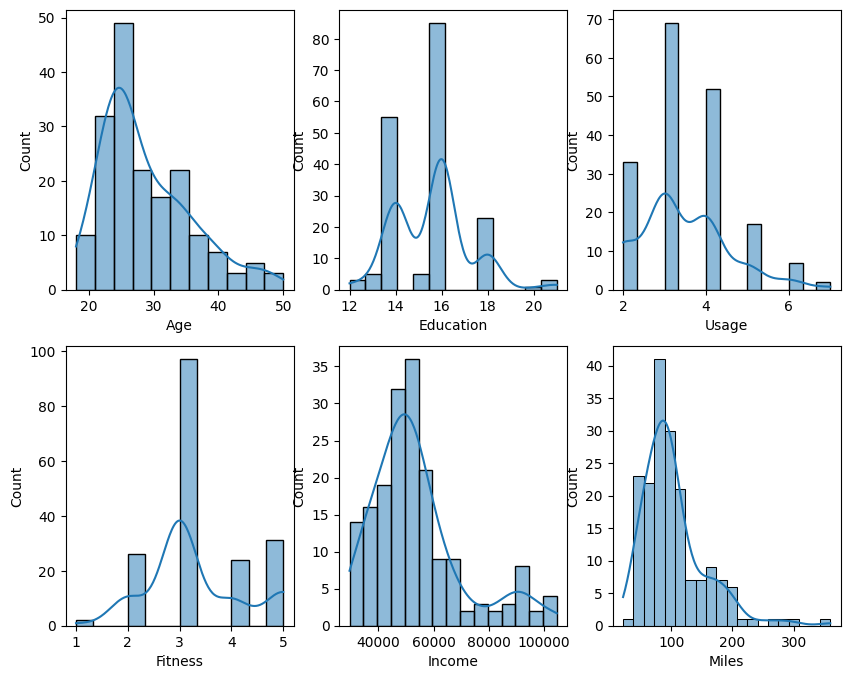

In [17]:
list = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]

fig,ax= plt.subplots(2,3,figsize=(10,8))

count = 0
for i in range(2) :
    for j in range(3) :
        sns.histplot(data=df, x=list[count], kde=True, ax=ax[i,j])
        count += 1




plt.show()


Outliers detection using Boxplots.

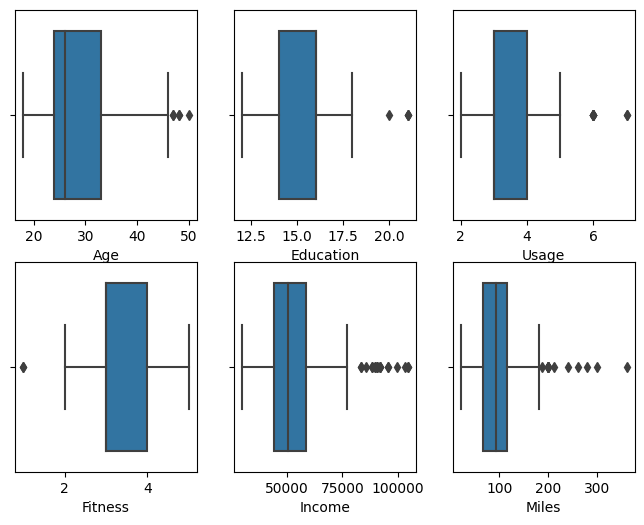

In [18]:
list = ['Age','Education','Usage','Fitness','Income','Miles']

fig,ax = plt.subplots(2,3,figsize = (8,6))

count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data = df, x = list[count],ax = ax[i,j])
        count += 1
plt.show()


From the above vizualisation it is clear that "Age", "Education" and "Usage" having very few outliers.
While "Income" and "Miles" are having more outliers.

### Understanding the distribution of data for the qualitative attributes like "Product", "Gender" and "MaritalStatus"

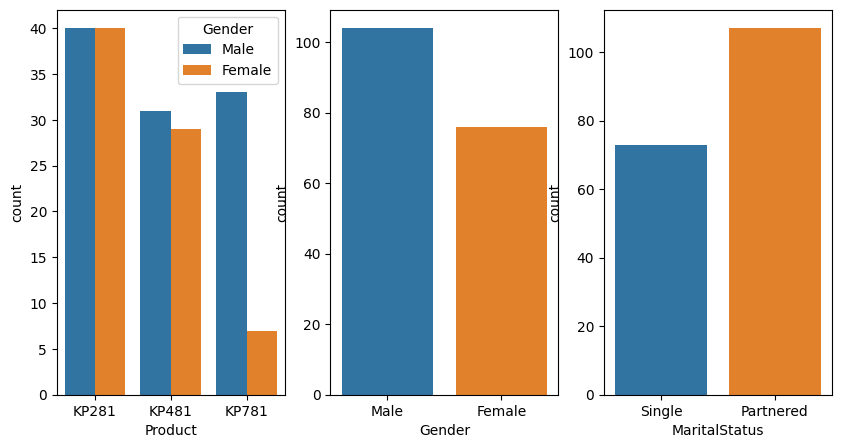

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(data = df, x = 'Product',hue = 'Gender')
plt.subplot(1,3,2)
sns.countplot(data = df, x = 'Gender')
plt.subplot(1,3,3)
sns.countplot(data = df, x ='MaritalStatus')
plt.show()

In [21]:
df.groupby(['Product']).agg({'Product':'count'})/len(df)

,Product
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


In [22]:
df.groupby(['Gender']).agg({'Gender':'count'})/len(df)

,Gender
Gender,
Female,0.422222
Male,0.577778


In [23]:
df.groupby(['MaritalStatus']).agg({'MaritalStatus':'count'})/len(df)

,MaritalStatus
MaritalStatus,
Partnered,0.594444
Single,0.405556


1. From the above graphs it is clear that KP281 is the most frequent product. 44.44% of customer have purchased KP281 product, where as 33.33% have purchased KP481 and 22.22% have purchased KP781.
2. There are no of "Males" (57.77%) are greater then "Females" (42.22%).
3. Also 59.44% customers are "Partnered" compare to 40.55% "Single" in the dataset.

## Bivariate Analysis


Lets check if features like "Gender" or "MaritalStatus" have any effect on the product purchased.

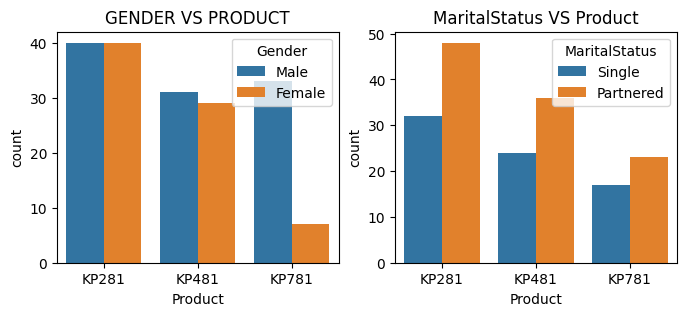

In [23]:
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.countplot(data = df, x ='Product', hue ='Gender')
plt.title("GENDER VS PRODUCT")
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'Product', hue = 'MaritalStatus',)
plt.title("MaritalStatus VS Product")
plt.show()

1. Product vs Gender and MaritalStatus
2. Equal no of males and females have purchased KP281 product and almost same for the product KP481.
3. Most of male customer have purchased the KP781 product.
4. Customer who is partnered, is more likely to purchase the product.

### Lets check if other features like "Age", "Education", "Usage", "Fitness", "Income" and "Miles" have any effect on the product purchased.

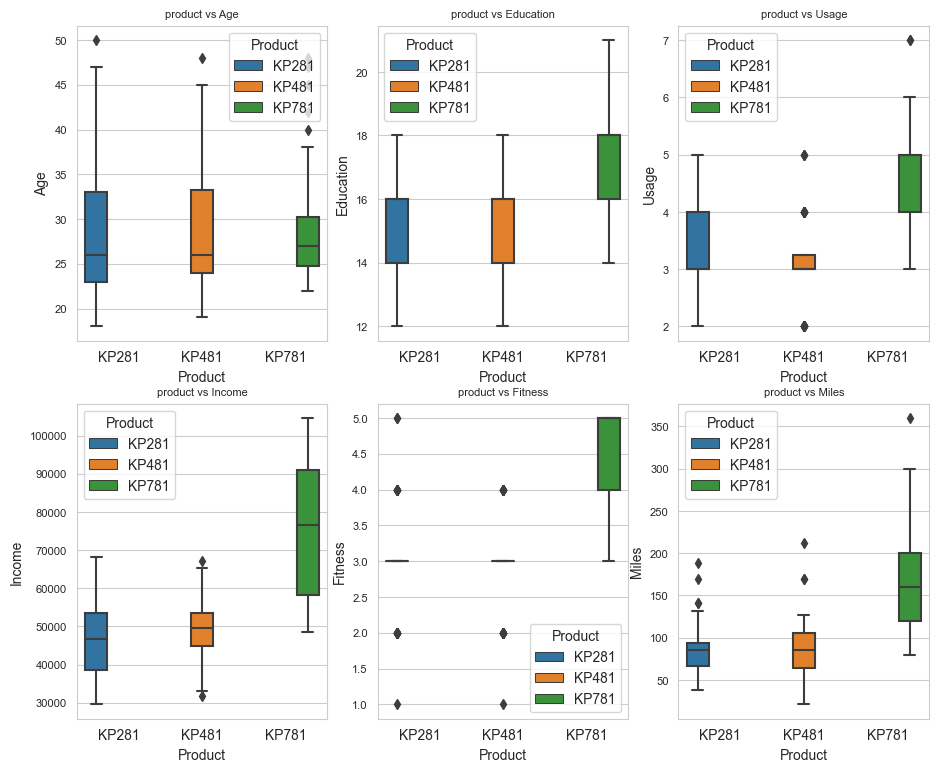

In [33]:
attrs = [ "Age", "Education", "Usage", "Income", "Fitness", "Miles"]
sns.set_style(style = 'whitegrid')
fig,ax = plt.subplots(2,3,figsize=(11,9))
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data = df ,x = 'Product', y = attrs[count], hue = 'Product', ax = ax[i,j])
        ax[i,j].set_title(f"product vs {attrs[count]}",fontsize=8)
        ax[i,j].tick_params(axis = 'y', labelsize = 8)
        count+=1
plt.show()

## Multivariate Analysis

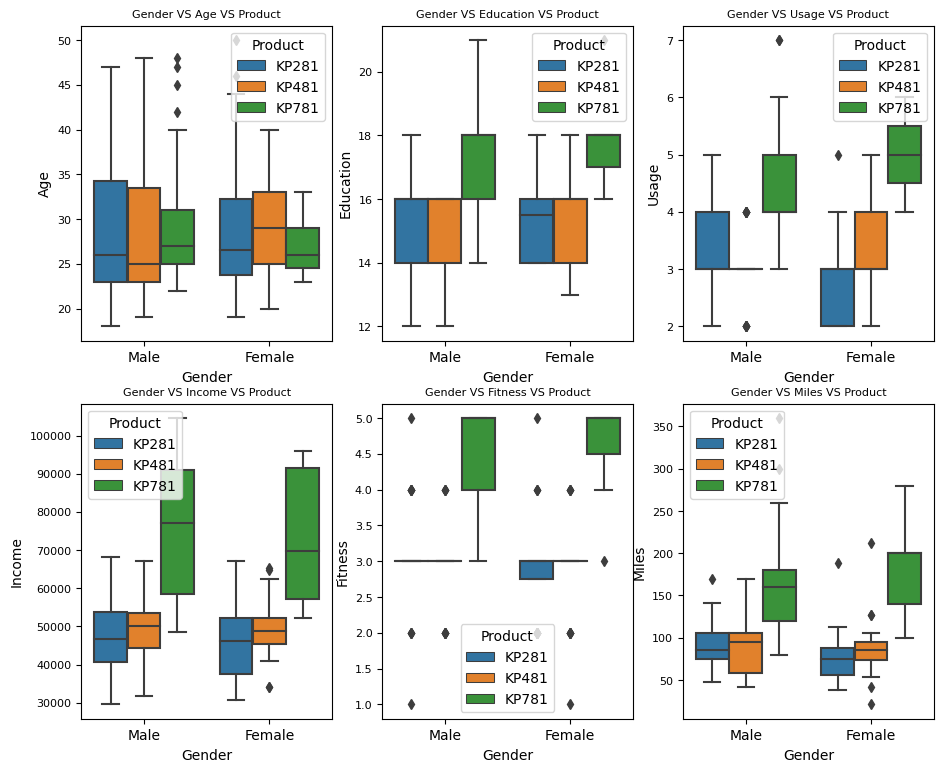

In [27]:
attrs = [ "Age", "Education", "Usage", "Income", "Fitness", "Miles"]
fig,ax = plt.subplots(2,3,figsize = (11,9))
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data = df, x = 'Gender', y = attrs[count], hue = 'Product',ax = ax[i,j])
        ax[i,j].set_title(f"Gender VS {attrs[count]} VS Product",fontsize = 8)
        ax[i,j].tick_params(axis = 'y', labelsize = 8)
        ax[i,j].tick_params(axis = 'y', labelsize = 8)
        count+=1
plt.show()


## From the above  graph we can say that :

### Product vs Age
Customers purchasing products KP281 & KP481 are having same Age median value.
Customers whose age lies between 25-30, are more likely to buy KP781 product
### Product vs Education
Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.
### Product vs Fitness
The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.
### Product vs Income
Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.
### Product vs Miles
If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

## For correlation : Heatmap and Pairplots

C:\Users\htc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


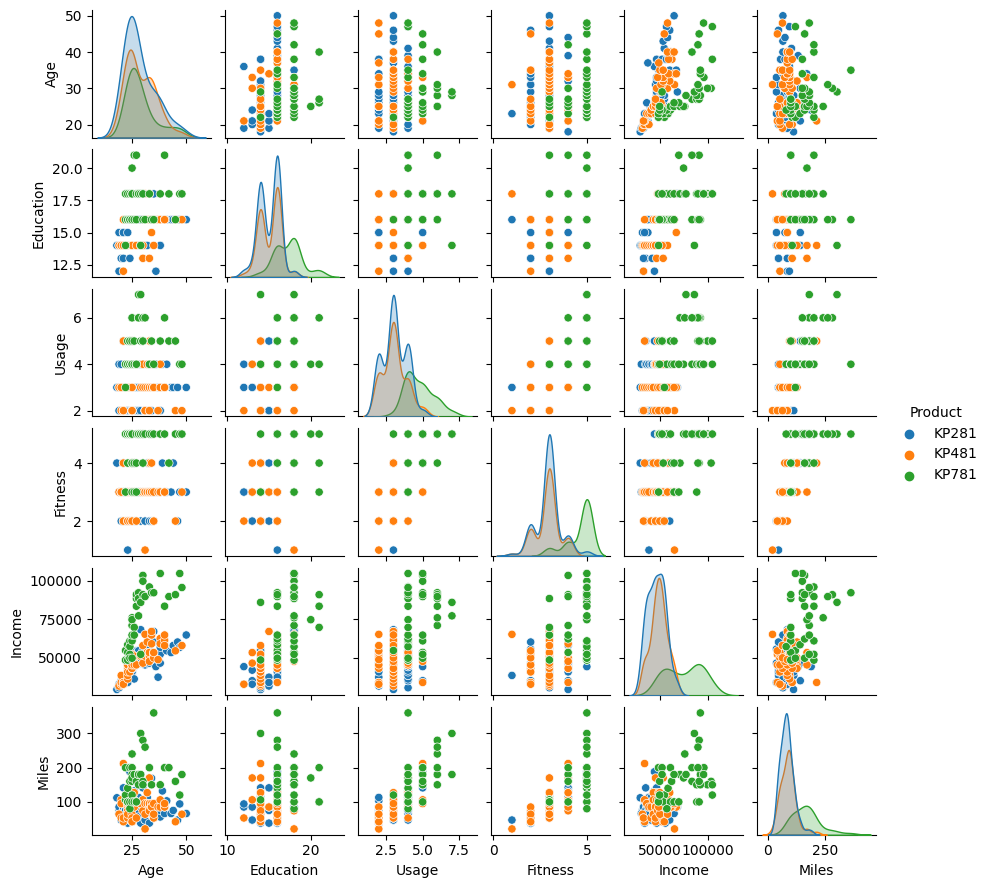

In [29]:

sns.pairplot(data=df, hue="Product", height=1.5,aspect=1)
plt.show()
     

## From the above two graph relationship between data points are evaluated
1. Correlation between "Age" and "Miles" is 0.03.
2. Correlation between "Education" and "Income" is 0.62.
3. Correlation between "Usage" and "Fitness" is 0.66.
4. Correlation between "Fitness" and "Age" is 0.06.
5. Correlation between "Income" and "Usage" is 0.51.

## Computing Marginal and Conditional Probablities

In [30]:
df["Product"].value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

Probability of buying KP281, KP481 and KP781 are 0.44,0.33 and 0.22 respectively

In [31]:
df["Gender"].value_counts(normalize=True)

Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64

1. Probability of Male customer is 0.57.
2. Probability of Female customer is 0.42.

In [32]:
df["MaritalStatus"].value_counts(normalize=True)

MaritalStatus
Partnered    0.594444
Single       0.405556
Name: proportion, dtype: float64

1. Probability of Partnered customer is 0.59.
2. Probability of Single customer is 0.40.

## Probability for each "Product" for the given "Gender" 

In [42]:
df2 = pd.crosstab(index = df['Gender'], columns = df['Product'],margins = True)
df2

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [39]:
df2.loc['Male'].sum()

104

In [45]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender != "Female" and gender != "Male":
        return "Invalid gender value."

    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()

    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")

    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")

p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



In [48]:
df2 = pd.crosstab(index =df['Gender'], columns = df['Product'])

In [53]:
def prob_product_given_gender(gender,print_marginal = False):
    if gender != "Female" and gender != 'Male':
        return 'Invalid gender value'
    
    df1 = pd.crosstab(index = df['Gender'], columns = df['Product'])
    p_781 = df1['KP781'][gender]/df1.loc[gender].sum()
    p_481 = df1['KP481'][gender]/df1.loc[gender].sum()
    p_281 = df1['KP281'][gender]/df1.loc[gender].sum()
    
    if print_marginal:
        print(f"p(Male) : {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"p(female) : {df1.loc['Female'].sum()/len(df):.2f}")
        
    print(f"p(KP781/{gender}) : {p_781:.2f}")
    print(f"p(KP281)/{gender} : {p_281:.2f}")
    print(f"p(KP481)/{gender} : {p_481:.2f}")
    
    
prob_product_given_gender('Male',True)

prob_product_given_gender('Female')

p(Male) : 0.58
p(female) : 0.42
p(KP781/Male) : 0.32
p(KP281)/Male : 0.38
p(KP481)/Male : 0.30
p(KP781/Female) : 0.09
p(KP281)/Female : 0.53
p(KP481)/Female : 0.38


1. Probability of Female customer buying KP281(53%) is more than male(38%).
2. KP281 is more recommended for female customers.
3. Probability of Male customer buying Product KP781(32%) is way more than female(9%).
4. Probability of Female customer buying Product KP481(38%) is significantly higher than male (30%. )
5. KP481 product is specifically recommended for Female customers who are intermediate user.

## Probability for each "Product" for the given "MaritalStatus" 

In [54]:
def p_prod_given_mstatus(status, print_marginal=False):
    if status != "Single" and status != "Partnered":
        return "Invalid marital status value."

    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_781 = df1['KP781'][status] / df1.loc[status].sum()
    p_481 = df1['KP481'][status] / df1.loc[status].sum()
    p_281 = df1['KP281'][status] / df1.loc[status].sum()

    if print_marginal:
        print(f"P(Single): {df1.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1.loc['Partnered'].sum()/len(df):.2f}\n")

    print(f"P(KP781/{status}): {p_781:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP281/{status}): {p_281:.2f}\n")

p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



## Conversion of "Fitness" attributes to "Object_category" :

In [55]:
df_copy = df
df_copy["Fitness_Category"] = df["Fitness"]
df_copy["Fitness_Category"].replace({1:"Skinny Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"},inplace=True)

In [66]:
df_copy2['Age_Group'] = df['Age']
df_copy2['Age_Group'] = pd.cut(df_copy['Age_Group'],bins = [0,21,35,45,60],labels = ['teen','young','adults','elder'])

104581

## Conversion of "Age" attributes to "Object_category" :

In [56]:

df_copy["Age_Group"] = df["Age"]
df_copy["Age_Group"] = pd.cut(df["Age_Group"],bins=[0,21,35,45,60],labels=["Teen","Young","Adults","Elder"])

## Conversion of "Income" attributes to "Object_category" 

In [59]:
df_copy["Income_Group"] = df["Income"]
df_copy["Income_Group"] = pd.cut(df_copy["Income_Group"],bins=[0,35000,70000,110000],labels=["Low","Average","High"])
df_copy.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_Category,Age_Group,Income_Group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,Teen,Low
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,Teen,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,Teen,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,Teen,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,Teen,Average


In [67]:
np.round(pd.crosstab(index=df_copy["Product"],columns=df_copy["Age_Group"],normalize='columns',margins=True)*100,2)

Age_Group,Teen,Young,Adults,Elder,All
Product,,,,,
KP281,58.82,41.48,50.00,50.00,44.44
KP481,41.18,33.33,31.82,16.67,33.33
KP781,0.00,25.19,18.18,33.33,22.22


In [68]:
np.round(pd.crosstab(index=df_copy["Product"],columns=df_copy["Fitness_Category"],normalize="columns")*100,2)

Fitness_Category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Skinny Shape
Product,,,,,
KP281,55.67,53.85,6.45,37.50,50.0
KP481,40.21,46.15,0.00,33.33,50.0
KP781,4.12,0.00,93.55,29.17,0.0


In [69]:
np.round(pd.crosstab(index=[df_copy["Product"],df_copy["Fitness_Category"]],columns=df_copy["Gender"],normalize=True)*100,2)

Gender                    Female   Male
Product Fitness_Category               
KP281   Average Shape      14.44  15.56
        Bad Shape           5.56   2.22
        Excellent Shape     0.56   0.56
        Good Shape          1.67   3.33
        Skinny Shape        0.00   0.56
KP481   Average Shape      10.00  11.67
        Bad Shape           3.33   3.33
        Good Shape          2.22   2.22
        Skinny Shape        0.56   0.00
KP781   Average Shape       0.56   1.67
        Excellent Shape     2.78  13.33
        Good Shape          0.56   3.33

In [70]:
round(pd.crosstab(index=[df_copy["Product"],df_copy["MaritalStatus"]],columns=df_copy["Gender"],normalize=True)*100,2)

Gender                 Female   Male
Product MaritalStatus               
KP281   Partnered       15.00  11.67
        Single           7.22  10.56
KP481   Partnered        8.33  11.67
        Single           7.78   5.56
KP781   Partnered        2.22  10.56
        Single           1.67   7.78

In [71]:
round(pd.crosstab(index=[df_copy["Product"],df_copy["Income_Group"]],columns=df_copy["Gender"],normalize=True)*100,2)

Gender                Female   Male
Product Income_Group               
KP281   Low             2.22   2.22
        Average        20.00  20.00
KP481   Low             1.11   2.22
        Average        15.00  15.00
KP781   Average         2.22   7.22
        High            1.67  11.11

# Business Insights : Customer Profiling for Each Product

## KP281

1. Easily affordable entry level product, which is also the popular and maximum selling product.
2. This product is easily afforded by both Male and Female customers.
3. Average distance covered in this model is around 70 to 80 miles.
4. Product is used 3 to 4 times a week.
5. Most of the customer who have purchased the product have rated Average shape as the fitness rating.
6. Teenage to Elder beginner level customers prefer this product.
7. Partnered male and female customers bought this product more than single male customers.
8. Average Income group customer have preferred this product.

## KP481

1. This is an Intermediate level Product.
2. KP481 is the second most popular product among the customers.
3. Fitness Level of this product users varies from Bad to Average Shape depending on their usage.
4. Average distance covered in this product is from 80 to 100 miles per week.
5. Probability of Female customer buying KP481 is significantly higher than male.
6. KP481 product is specifically recommended for Female customers who are intermediate user.
7. Three different age groups prefer this product - Teen, Young and Adult.
8. Average Income group customer have preferred this product.
9. More Partnered customers prefer this product.
10. The distance travelled on the KP481 treadmill is roughly between 75 - 100 Miles. It is also the 2nd most distance travelled model

## KP781

1. Due to the High Price & being the advanced type, customer prefers less of this product.
2. Customers use this product mainly to cover more distance.
3. Customers who use this product have rated excelled shape as fitness rating.
4. Customer walk/run average 120 to 200 or more miles per week on his product.
5. Probability of Male customer buying Product KP781(32%) is way more than female(9%).
6. Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.
7. Middle aged to higher age customers tend to use this model to cover more distance.
8. High Income group customer have preferred this product.
9. Partnered Male bought KP781 treadmill compared to Partnered Female.
10. Customers who have more experience with previous aerofit products tend to buy this product
11. This product is preferred by the customer where the correlation between Education and Income is High

# Recommendation
1. KP781 should be marketed as a premium Model and high income group and educational over 20 years segments could be result in more sales.
2. Female who prefer exercising equipments are very low here. Hence, we should run a marketing campaign on to encourage women to exercise more
3. KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 35K - 70K Dollars. These models should promoted as budget treadmills.
4. As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.
5. KP781 product should be promotted using influencers and other international atheletes.
6. Research required for expanding market beyond 50 years of age considering health pros and cons.
7. Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.
8. KP781 can be recommended for Female customers who exercises extensively along with easy usage guidance since this type is advanced.
9. Target the Age group above 40 years to recommend Product KP781.